Step 1: Import Libraries

In [2]:
!pip install yfinance


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
pip install ta-lib

  Using cached TA-Lib-0.4.28.tar.gz (357 kB)


In [3]:
# Data Manipulation
import numpy as np
import pandas as pd
import yfinance as yf

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

Step 2: Import Data

Step 3: Define Predictor/Independent Variables

In [4]:
# Pull NIFTY data from Yahoo finance
df = yf.download('TSLA','1970-01-01', '2023-12-30')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [29]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

In [ ]:
Step 4: Define Target/Dependent Variable


In [31]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [32]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [33]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

In [34]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[5.6812250124806535e-18]
1,High,[5.6861277816647104e-18]
2,Low,[5.620138101360281e-18]
3,Close,[5.583106098723241e-18]
4,Adj Close,[5.006536414703543e-18]
5,Volume,[9.713162277356153e-11]
6,S_10,[5.471752301907082e-18]
7,Corr,[3.1490350717776856e-19]
8,RSI,[3.6462753820701205e-17]


In [35]:
# Specify the start and end dates for prediction
start_date = '2019-12-22'
end_date = '2024-01-01'

# Create a list containing the start and end dates
prediction_date = [start_date, end_date]

# Use the list of dates for prediction
probability = model.predict_proba(X_test)
print(probability)

[[0.49653675 0.50346325]
 [0.49587905 0.50412095]
 [0.49479691 0.50520309]
 ...
 [0.49883229 0.50116771]
 [0.49917317 0.50082683]
 [0.49896485 0.50103515]]


In [36]:
predicted = model.predict(X_test)

In [ ]:
print (predicted)

In [38]:
# Define predicted_labels as buy signal (1)
predicted_labels = 1

# Find the dates with predicted buy signals (Signal = 1)
buy_signal_dates = prediction_date[predicted_labels == 1]

# Print the date(s) with buy signal(s)
print("\nDate(s) with Buy Signal(s):")
print(buy_signal_dates)
print(predicted)


Date(s) with Buy Signal(s):
2024-01-01
[1 1 1 ... 1 1 1]


Step 10: Evaluate The Model

In [40]:
print(metrics.confusion_matrix(y_test, predicted))

[[  0 665]
 [  0 764]]


Step 11: Create Trading Strategy Using The Model

/var/folders/fn/m239lw_11_l3vhyq209j55z80000gn/T/ipykernel_68095/2529425454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Signal'] = model.predict(X)
/var/folders/fn/m239lw_11_l3vhyq209j55z80000gn/T/ipykernel_68095/2529425454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AAPL_returns'] = np.log(df['Close']/df['Close'].shift(1))
/var/folders/fn/m239lw_11_l3vhyq209j55z80000gn/T/ipykernel_68095/2529425454.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

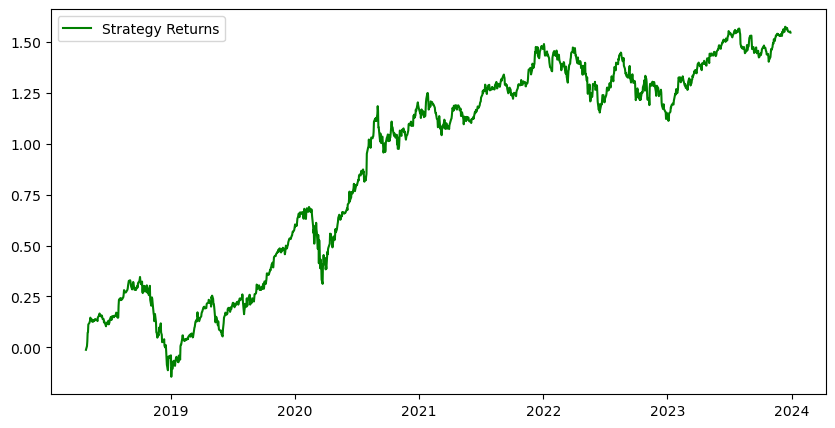

In [41]:
df['Predicted_Signal'] = model.predict(X)
df['AAPL_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_AAPL_returns = np.cumsum(df[split:]['AAPL_returns'])


df['Strategy_returns'] = df['AAPL_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()